In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # If you need tokenizers


[nltk_data] Downloading package stopwords to /home/omar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/omar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import nltk

# Loading the dataset

In [3]:
revs = pd.read_csv('dataset.csv')
revs.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [4]:
revs.shape

(6417106, 5)

In [5]:
revs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int64(3), object(2)
memory usage: 244.8+ MB


# 1. Data Cleaning

**Null Value Checking**

In [6]:
revs.isnull().sum()

app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64

In [7]:
revs = revs[['review_score','review_text']]

In [8]:
revs.isnull().sum()

review_score       0
review_text     7305
dtype: int64

In [9]:
revs.dropna(inplace = True)

In [10]:
revs.head()

,review_score,review_text
0,1,Ruined my life.
1,1,This will be more of a ''my experience with th...
2,1,This game saved my virginity.
3,1,• Do you like original games? • Do you like ga...
4,1,"Easy to learn, hard to master."


In [11]:
revs['review_score'].unique()

array([ 1, -1])

In [12]:
revs.shape

(6409801, 2)

In [13]:
new_df = revs.sample(n = 50000)

In [14]:
new_df.shape

(50000, 2)

In [15]:
new_df.isnull().sum()

review_score    0
review_text     0
dtype: int64

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 5615198 to 5583001
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_score  50000 non-null  int64 
 1   review_text   50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [17]:
new_df.reset_index(drop = True, inplace = True)

In [18]:
new_df.head()

,review_score,review_text
0,1,Early Access Review
1,1,Im going to give this game a thumbs up but thi...
2,1,"This game was very dark, and is almost the exa..."
3,1,"Great game, and should definitley be purchased..."
4,-1,EDIT 04/01/17: It's worth updating just to le...


**Checking if there is any duplicated row**

In [19]:
new_df.duplicated().sum()

8483

**Dropping the duplicated rows**

In [20]:
new_df.drop_duplicates(inplace=True)

In [21]:
new_df.duplicated().sum()

0

In [22]:
new_df.shape

(41517, 2)

In [23]:
new_df.rename(columns={'review_score':'target','review_text':'text'},inplace=True)

In [24]:
new_df.head()

,target,text
0,1,Early Access Review
1,1,Im going to give this game a thumbs up but thi...
2,1,"This game was very dark, and is almost the exa..."
3,1,"Great game, and should definitley be purchased..."
4,-1,EDIT 04/01/17: It's worth updating just to le...


# 2. EDA

In [25]:
new_df['target'].value_counts()

target
 1    34079
-1     7438
Name: count, dtype: int64

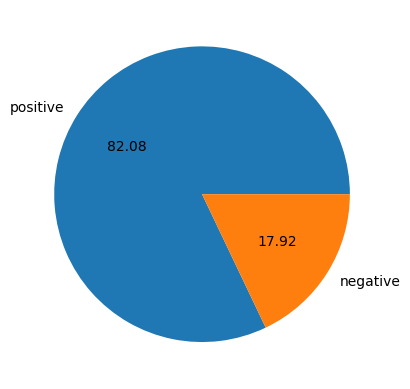

In [26]:
plt.pie(new_df['target'].value_counts(),labels=['positive','negative'],autopct='%0.2f')
plt.show()

> Data is imbalanced

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/omar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
new_df['char_num'] = new_df['text'].apply(len)

In [29]:
new_df.head()

,target,text,char_num
0,1,Early Access Review,20
1,1,Im going to give this game a thumbs up but thi...,285
2,1,"This game was very dark, and is almost the exa...",221
3,1,"Great game, and should definitley be purchased...",75
4,-1,EDIT 04/01/17: It's worth updating just to le...,3944


In [30]:
#word nums
new_df['word_num'] = new_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
new_df.head()

,target,text,char_num,word_num
0,1,Early Access Review,20,3
1,1,Im going to give this game a thumbs up but thi...,285,57
2,1,"This game was very dark, and is almost the exa...",221,49
3,1,"Great game, and should definitley be purchased...",75,16
4,-1,EDIT 04/01/17: It's worth updating just to le...,3944,860


In [31]:
#num of sentences
new_df['sent_num'] = new_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
new_df.head()

,target,text,char_num,word_num,sent_num
0,1,Early Access Review,20,3,1
1,1,Im going to give this game a thumbs up but thi...,285,57,1
2,1,"This game was very dark, and is almost the exa...",221,49,2
3,1,"Great game, and should definitley be purchased...",75,16,2
4,-1,EDIT 04/01/17: It's worth updating just to le...,3944,860,35


In [32]:
new_df[['char_num','word_num','sent_num']].describe()

,char_num,word_num,sent_num
count,41517.000000,41517.000000,41517.000000
mean,366.272611,77.034805,4.334225
std,640.144408,133.909189,6.181509
min,1.000000,0.000000,0.000000
25%,62.000000,14.000000,1.000000
50%,150.000000,32.000000,2.000000
75%,391.000000,82.000000,5.000000
max,8013.000000,3012.000000,127.000000


In [33]:
#neg. reviews description
new_df[new_df['target'] == -1][['char_num','word_num','sent_num']].describe()

,char_num,word_num,sent_num
count,7438.000000,7438.000000,7438.000000
mean,468.562651,98.510621,5.300887
std,744.837485,153.989272,7.374467
min,1.000000,0.000000,0.000000
25%,83.000000,18.000000,1.000000
50%,215.000000,46.000000,3.000000
75%,533.750000,112.000000,6.000000
max,8013.000000,1625.000000,102.000000


In [34]:
#pos. reviews description
new_df[new_df['target'] == 1][['char_num','word_num','sent_num']].describe()

,char_num,word_num,sent_num
count,34079.000000,34079.000000,34079.000000
mean,343.947035,72.347545,4.123243
std,612.675364,128.638798,5.868090
min,1.000000,0.000000,0.000000
25%,59.000000,13.000000,1.000000
50%,140.000000,30.000000,2.000000
75%,362.000000,76.000000,5.000000
max,8002.000000,3012.000000,127.000000


In [35]:
import seaborn as sns

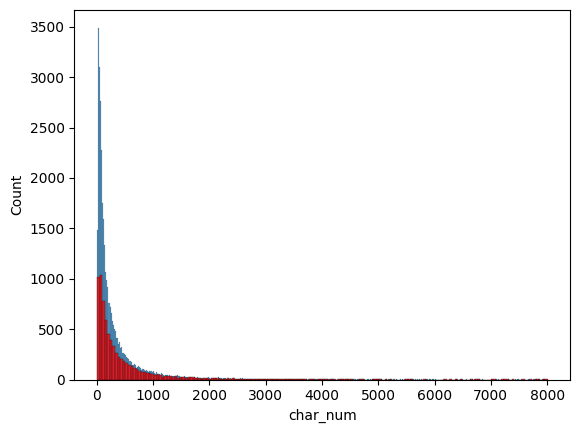

In [36]:
sns.histplot(new_df[new_df['target'] == 1]['char_num'])
sns.histplot(new_df[new_df['target'] == -1]['char_num'],color='red')

plt.show()

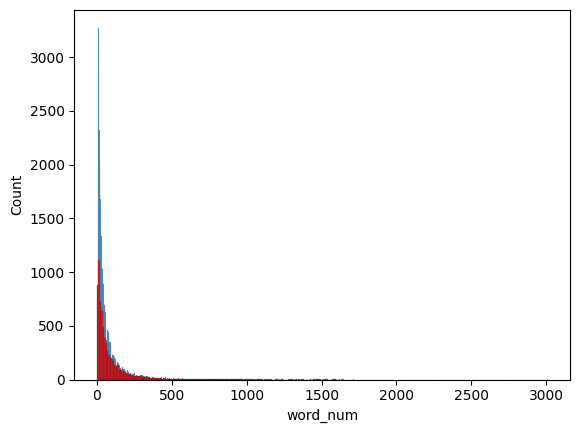

In [37]:
sns.histplot(new_df[new_df['target'] == 1]['word_num'])
sns.histplot(new_df[new_df['target'] == -1]['word_num'],color='red')

plt.show()

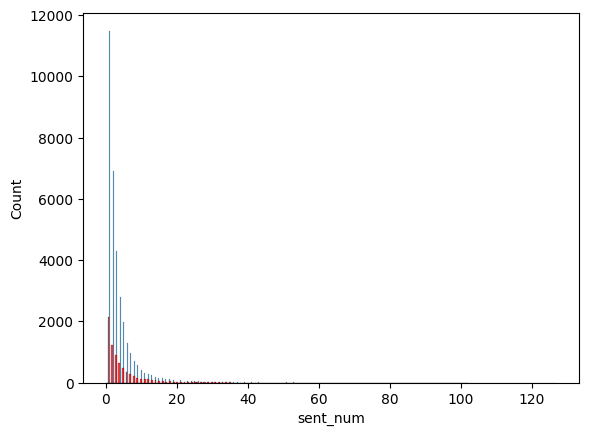

In [38]:
sns.histplot(new_df[new_df['target'] == 1]['sent_num'])
sns.histplot(new_df[new_df['target'] == -1]['sent_num'],color='red')

plt.show()

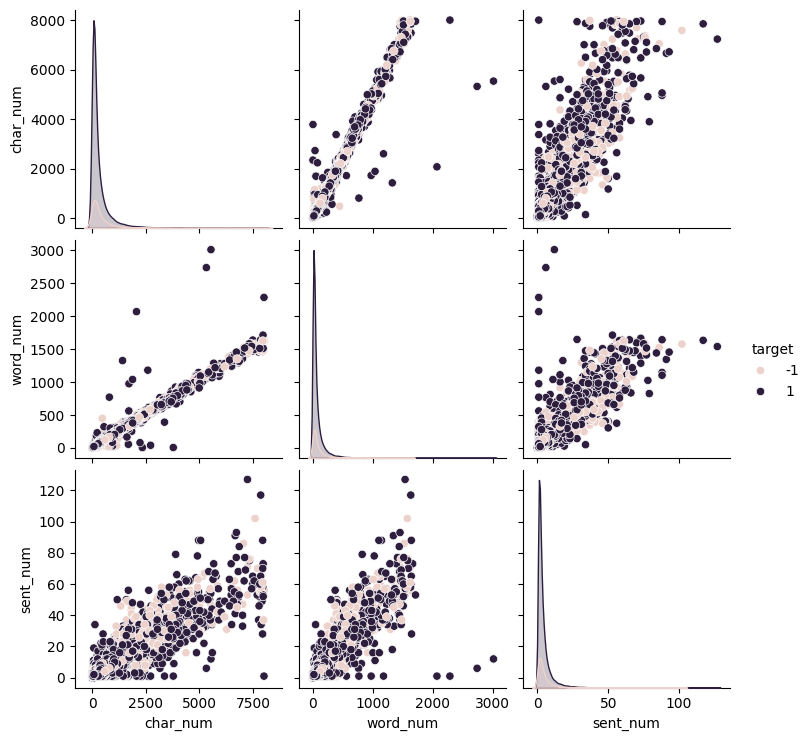

In [39]:
sns.pairplot(new_df,hue='target')
plt.show()

# 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* stemming

In [41]:
new_df.reset_index(drop = True, inplace = True)

In [42]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
def convert_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    x = []
    y =[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    for i in x:
        y.append(ps.stem(i))
    return ' '.join(y)

In [45]:
new_df['text'][8]

' Early Access Review'

In [46]:
new_df['converted_text']=new_df['text'].apply(convert_text)

In [47]:
new_df.head()

,target,text,char_num,word_num,sent_num,converted_text
0,1,Early Access Review,20,3,1,earli access review
1,1,Im going to give this game a thumbs up but thi...,285,57,1,im go give game thumb game could use improv ad...
2,1,"This game was very dark, and is almost the exa...",221,49,2,game dark almost exact oppisit postal 2. inten...
3,1,"Great game, and should definitley be purchased...",75,16,2,great game definitley purchas money 9/10
4,-1,EDIT 04/01/17: It's worth updating just to le...,3944,860,35,edit 04/01/17 's worth updat let peopl know 'v...


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size = 10,background_color = 'white')

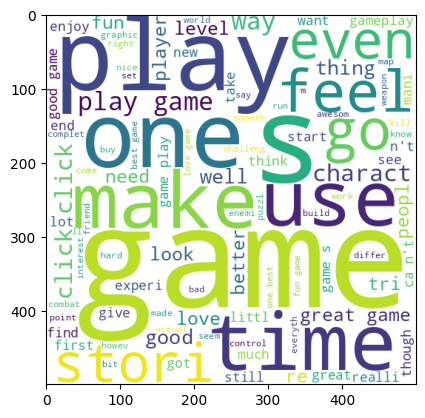

In [49]:
pos_wc = wc.generate(new_df[new_df['target']==1]['converted_text'].str.cat(sep=" "))
plt.imshow(pos_wc)
plt.show()

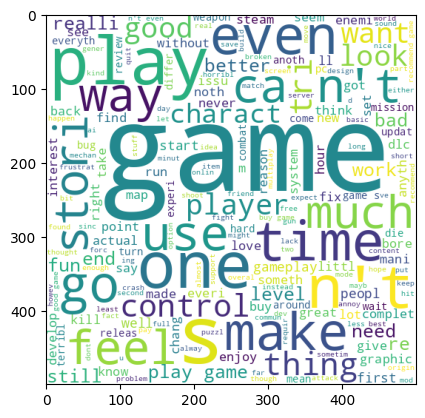

In [50]:
neg_wc = wc.generate(new_df[new_df['target']==-1]['converted_text'].str.cat(sep=" "))
plt.imshow(neg_wc)
plt.show()

# 4. Model Building

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features = 3000)
tfidf = TfidfVectorizer(max_features=5000)

In [52]:
X = cv.fit_transform(new_df['converted_text']).toarray()

In [53]:
X.shape

(41517, 3000)

In [54]:
y = new_df['target'].values

In [55]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 34)

In [57]:
X_train.shape

(33213, 3000)

In [58]:
y_train.shape

(33213,)

In [59]:
X_test.shape

(8304, 3000)

In [60]:
y_test.shape

(8304,)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7872109826589595
[[ 719  849]
 [ 918 5818]]
0.872656367181641


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8653660886319846
[[ 906  662]
 [ 456 6280]]
0.9046384327283203


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7803468208092486
[[ 636  932]
 [ 892 5844]]
0.8624557260920898


> cv --> mnb

In [66]:
def checker(text):
    test = convert_text(text)
    X = cv.transform([test])
    response = mnb.predict(X)[0]
    if response ==  1:
        return 'Positive Review'
    else:
        return 'Negative Review'

In [67]:
checker('game is a waste of time')

'Negative Review'

In [68]:
checker('I really loved this game')

'Positive Review'

In [69]:
import pickle

# Assuming 'mnb' is your trained MultinomialNB model and 'cv' is your CountVectorizer
with open('model.pkl', 'wb') as file:
    pickle.dump(mnb, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(cv, file)
